# "2020 April One Day Holding Long Short Portfolio BackTest"
> "2020 April Portfolio"
- toc: false
- branch: master
- badges: false
- comments: true
- categories: [long, short, longshort]
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

In [25]:
#hide_input
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import gc
import glob
import matplotlib.pyplot as plt

In [26]:
#hide_input
df_testp=pd.read_csv('D:\\Downloads\\20204dayreturnpred2019train60K.csv')

In [27]:
#hide
df_testp=df_testp.loc[df_testp.Date>=20200401].loc[df_testp.Date<20200501].sort_values(by='Date',ascending=True).copy()

**Long-Short Portfolio**

In [28]:
#hide
df_agg=df_testp[['Date','pred','labelr1']].groupby(['Date','pred']).sum().reset_index();
df_agg['cumreturn1']=0.0
for l in range(len(df_agg)):
    df_agg['cumreturn1'][l]=np.prod((1+(df_agg['labelr1']/100))[:l])



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [29]:
#hide_input
df_agg

,Date,pred,labelr1,cumreturn1
0,20200401,1.0,-0.436200,1.000000
1,20200402,1.0,-12.519562,0.995638
2,20200403,1.0,2.484180,0.870988
3,20200406,1.0,-4.938272,0.892625
4,20200407,1.0,10.122484,0.848545
5,20200409,1.0,0.000000,0.934439
6,20200410,1.0,-1.374604,0.934439
7,20200413,1.0,-18.100880,0.921594
8,20200414,-1.0,0.000000,0.754777
9,20200414,1.0,-2.412551,0.754777


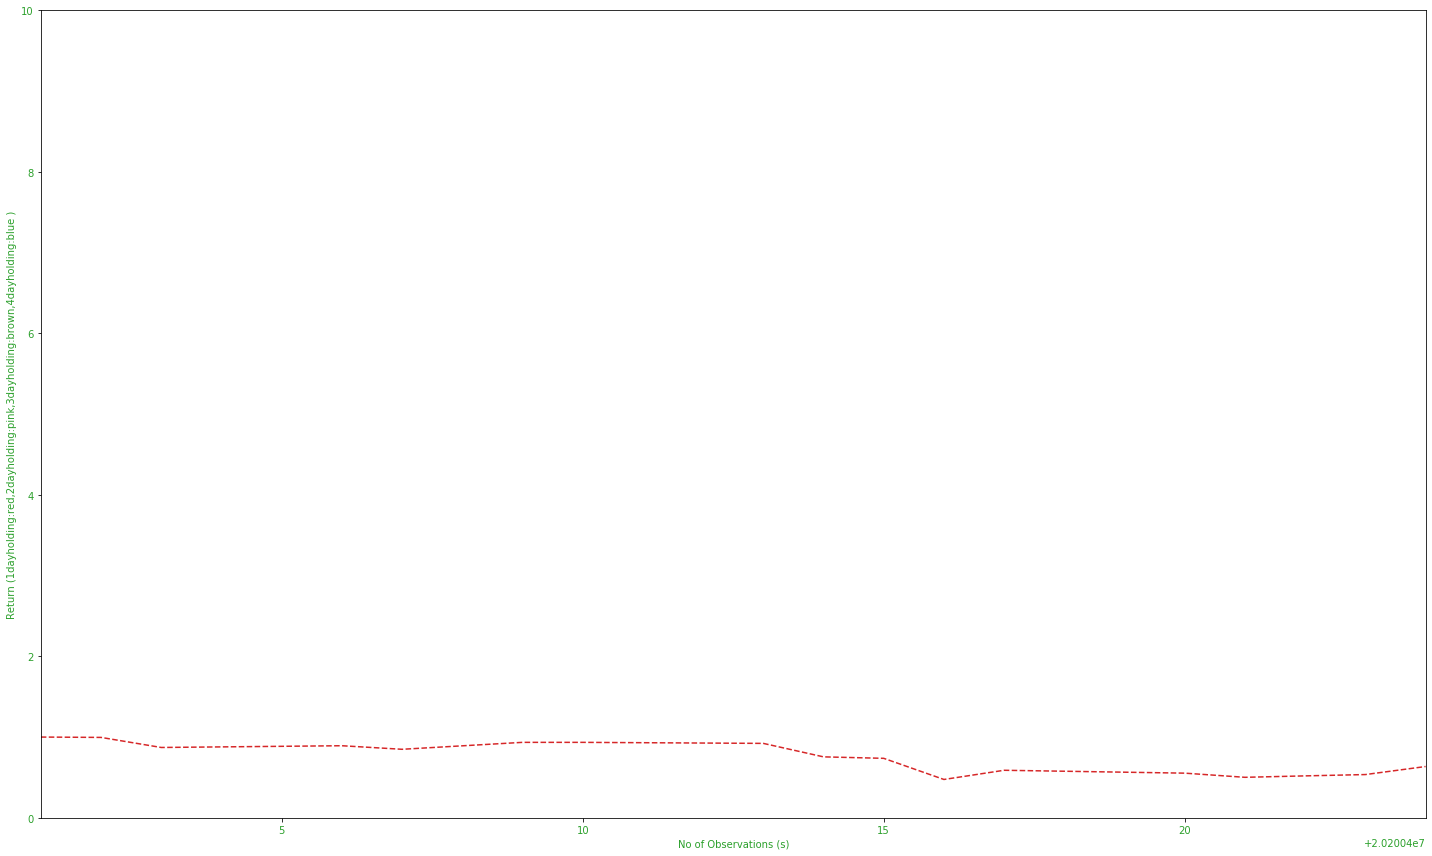

In [30]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_agg['Date'], df_agg['cumreturn1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')

a,b = 0,10
a1.set_ylim(a,b)


x,y =df_agg['Date'].min(),df_agg['Date'].max()
a1.set_xlim(x,y)



fig.tight_layout()

**Long portfolio**

In [31]:
#hide
df_agg=df_testp[['Date','pred','labelr1']].loc[df_testp.pred==1.0].groupby(['Date','pred']).sum().reset_index();
df_agg['cumreturn1']=0.0
for l in range(len(df_agg)):
    df_agg['cumreturn1'][l]=np.prod((1+(df_agg['labelr1']/100))[:l])



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [32]:
#hide_input
df_agg

,Date,pred,labelr1,cumreturn1
0,20200401,1.0,-0.436200,1.000000
1,20200402,1.0,-12.519562,0.995638
2,20200403,1.0,2.484180,0.870988
3,20200406,1.0,-4.938272,0.892625
4,20200407,1.0,10.122484,0.848545
5,20200409,1.0,0.000000,0.934439
6,20200410,1.0,-1.374604,0.934439
7,20200413,1.0,-18.100880,0.921594
8,20200414,1.0,-2.412551,0.754777
9,20200415,1.0,-35.537519,0.736568


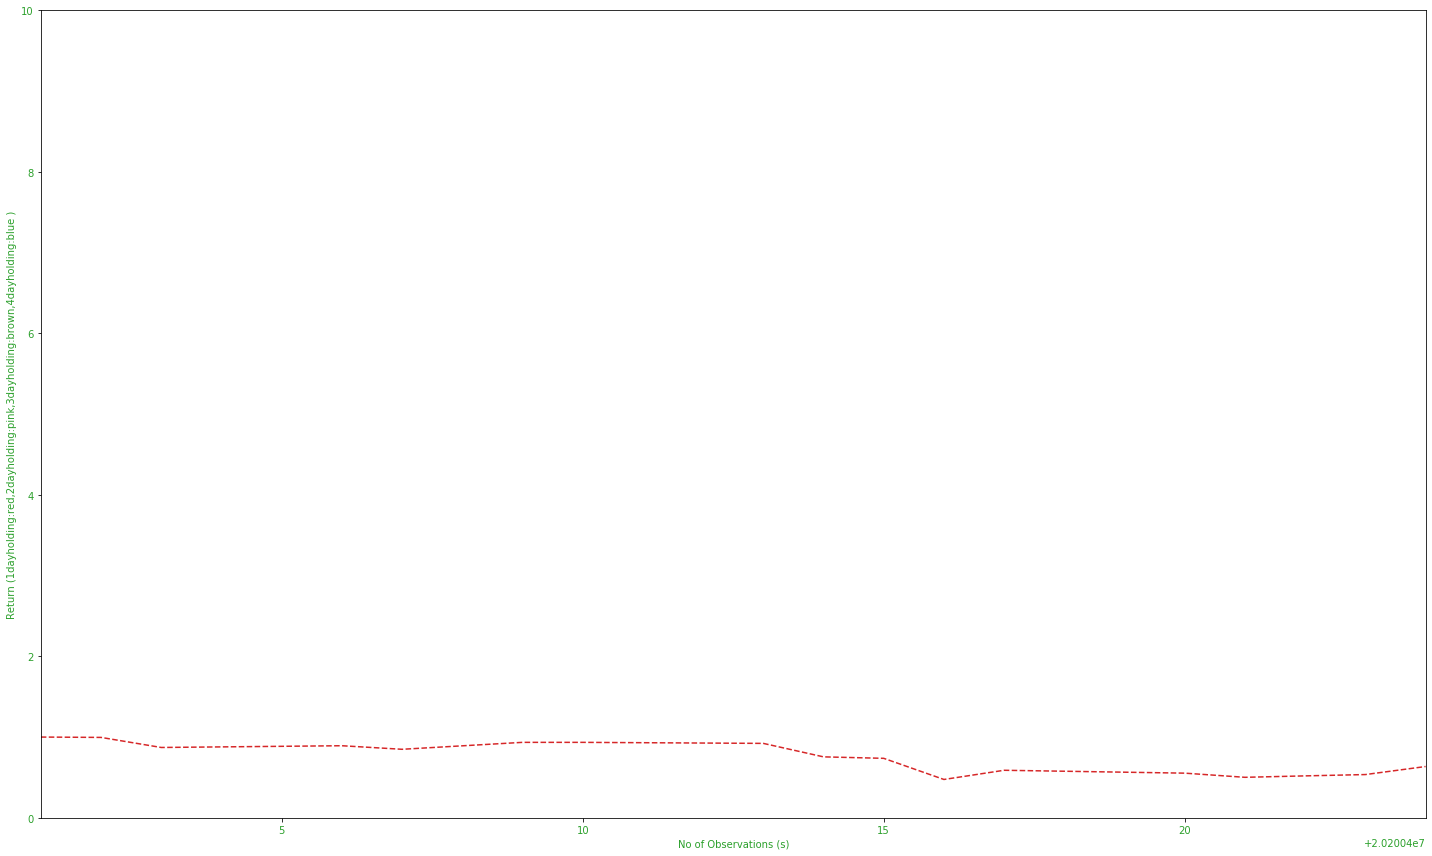

In [33]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_agg['Date'], df_agg['cumreturn1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')

a,b = 0,10
a1.set_ylim(a,b)


x,y =df_agg['Date'].min(),df_agg['Date'].max()
a1.set_xlim(x,y)



fig.tight_layout()

**Short Portfolio**

In [34]:
#hide
df_agg=df_testp[['Date','pred','labelr1']].loc[df_testp.pred==-1.0].groupby(['Date','pred']).sum().reset_index();
df_agg['cumreturn1']=0.0
for l in range(len(df_agg)):
    df_agg['cumreturn1'][l]=np.prod((1+(df_agg['labelr1']/100))[:l])



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [35]:
#hide_input
df_agg

,Date,pred,labelr1,cumreturn1
0,20200414,-1.0,0.0,1.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Attempting to set identical left == right == 20200414 results in singular transformations; automatically expanding.
  app.launch_new_instance()


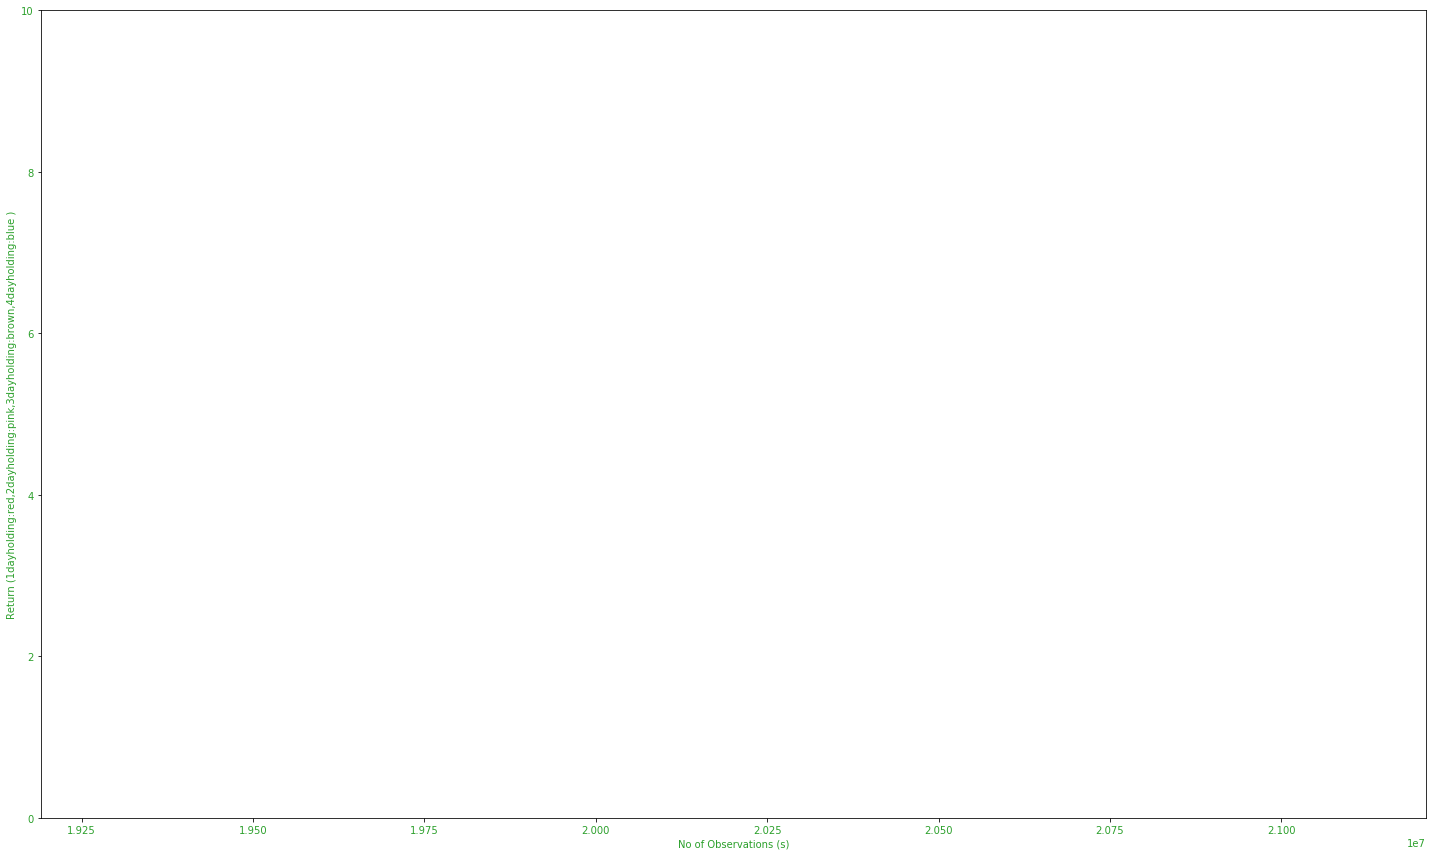

In [36]:
#hide
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_agg['Date'], df_agg['cumreturn1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')

a,b = 0,10
a1.set_ylim(a,b)


x,y =df_agg['Date'].min(),df_agg['Date'].max()
a1.set_xlim(x,y)



fig.tight_layout()